First few rows of the dataset:
        X_1       X_2       X_3       X_4       X_5       X_6       X_7  \
0 -0.416758 -0.056267 -2.136196 -0.051374 -0.441843 -0.324947 -0.659177   
1  1.640271 -1.793436 -0.841747 -0.920017 -0.435597 -0.169360  0.259525   
2  0.502881 -1.245288 -1.057952 -1.282671 -1.028784 -0.677846 -0.603480   
3 -0.909008  0.551454  2.292208 -0.450108 -0.030439 -0.360479 -0.702716   
4  0.041539 -1.117925  0.539058 -1.079760 -1.283575 -1.046998 -0.792632   

        X_8       X_9      X_10    target  
0 -0.567693 -0.547544  0.852092 -3.795281  
1 -0.292828 -0.168942 -0.261874  0.804154  
2 -0.884202 -1.207771 -0.926000 -0.099241  
3 -0.471052 -1.193779  0.930739 -4.883128  
4 -0.727004 -0.562541  0.791271 -0.410945  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     1000 non-null   float64
 1   X_2     1000 non-

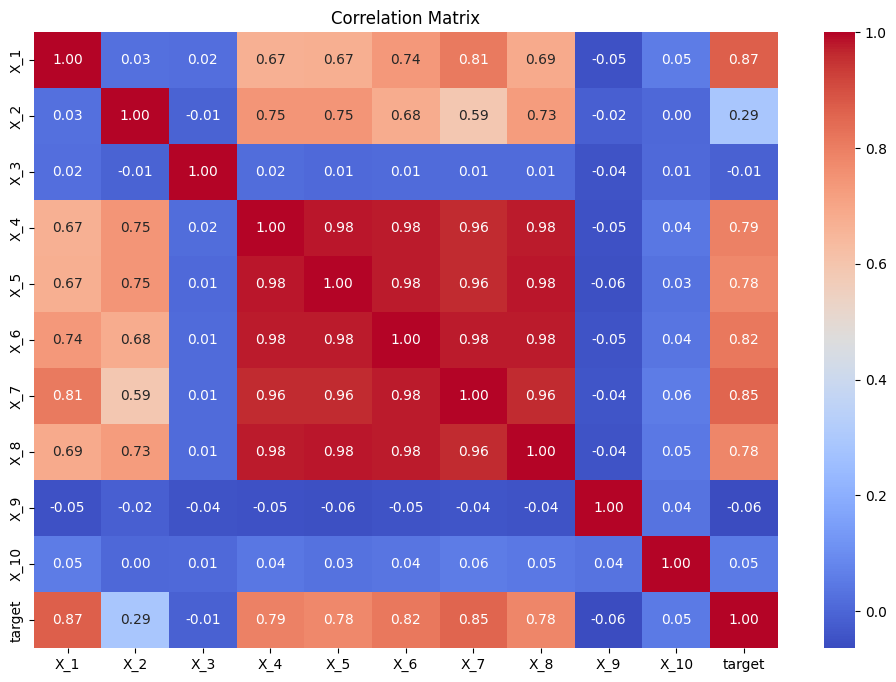

Learned Coefficients (beta):
[ 1.9        -0.79972516 -0.12747294  1.18452753  0.          0.
  1.07790128  0.         -0.1         0.        ]

Predictions on training data:
[-1.19116129  3.86492123  0.03714895 -3.6315673  -1.17288806]

Mean Squared Error: 4.259553841261075
R² Score: 0.8332797648490435


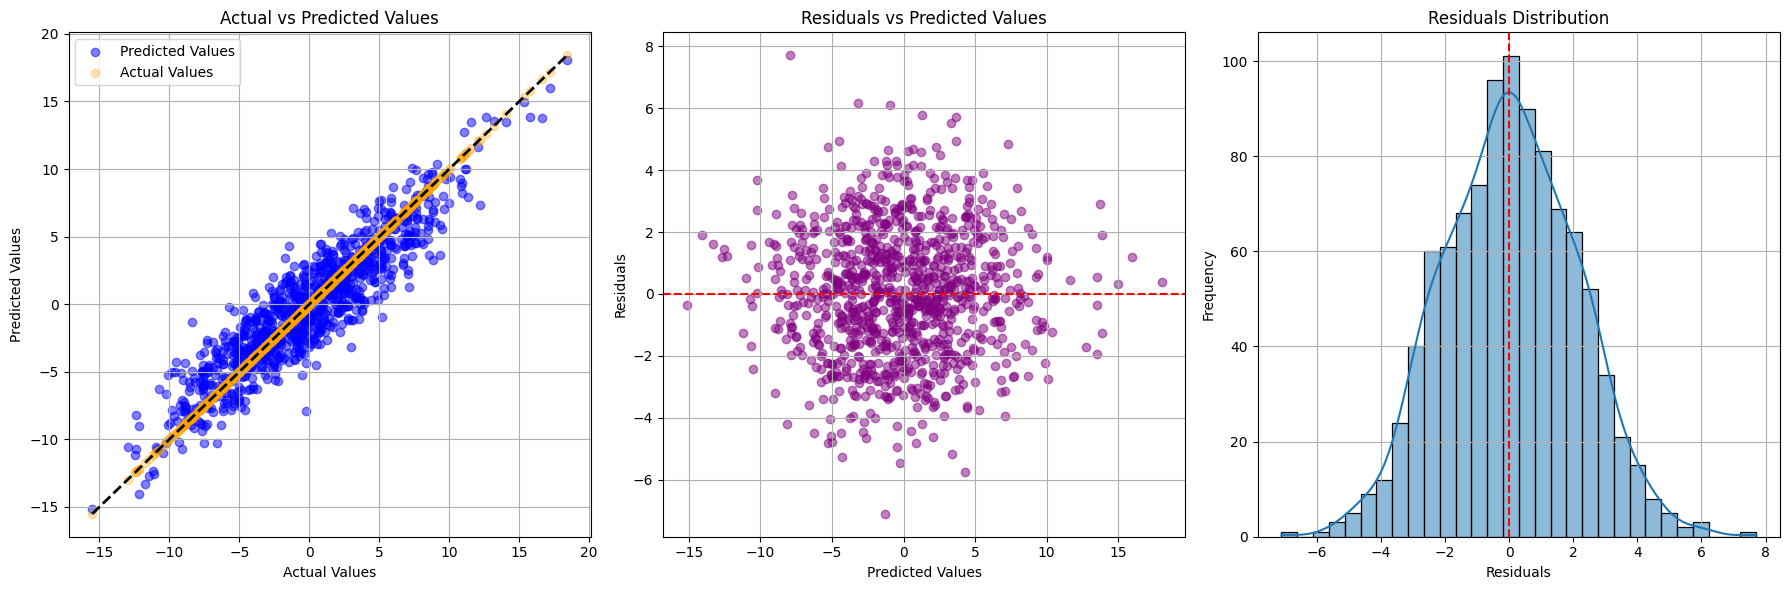


K-Fold Cross-validated R² Scores: [0.8478101579813108, 0.7853075344020576, 0.8656554265280713, 0.8167564923129432, 0.8295434962154844]
Average R² Score: 0.8290146214879733

Optimal alpha (lambda) found by LassoCV: 0.015199110829529346

Learned coefficients with polynomial features:
[ 1.90000000e+00 -4.42309836e-01 -1.00000000e-01  3.96081146e-01
  0.00000000e+00  0.00000000e+00  1.71899405e+00  0.00000000e+00
 -5.01181273e-02  0.00000000e+00  5.85364850e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.00000000e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.10725995e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.83702151e-03
  2.57453780e-02 -3.53037879e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.49015879e-01
 

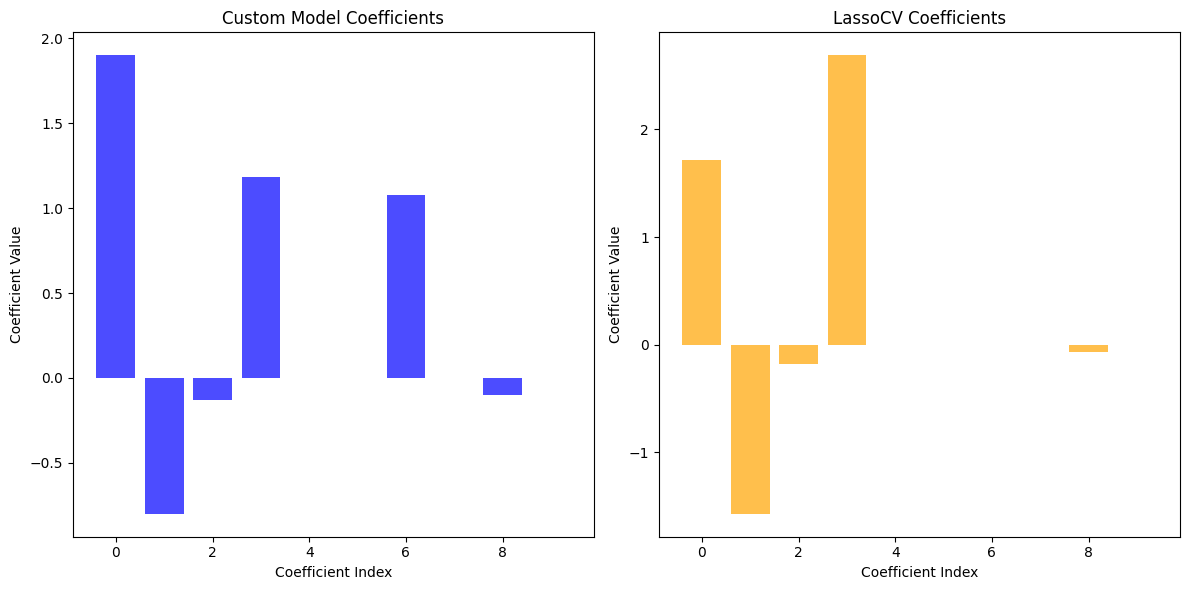

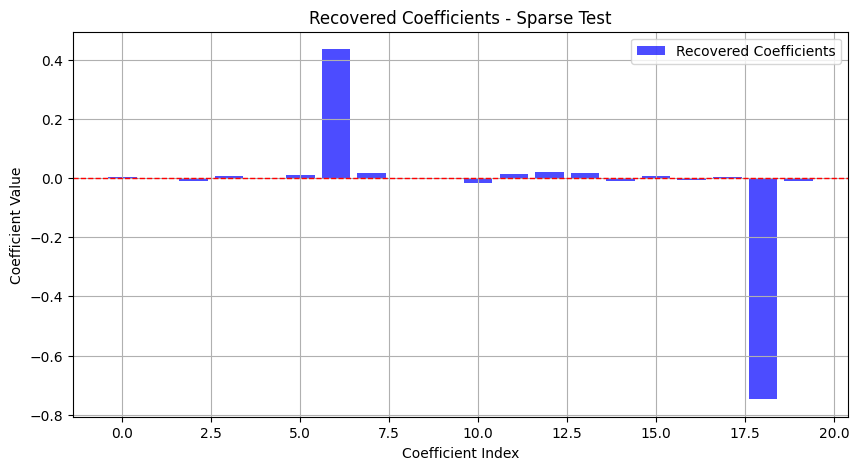

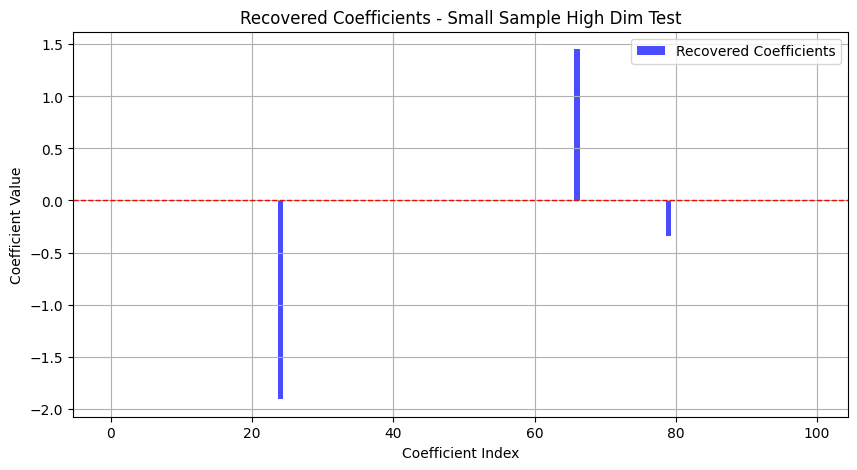

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the LassoHomotopyModel from your project
from model.LassoHomotopy import LassoHomotopyModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures

# -------------------------
# 1. Dataset Overview and Correlation Analysis
# -------------------------
# Load the dataset (adjust the path as necessary)
df = pd.read_csv("../LassoHomotopy/tests/collinear_data.csv")

# Display first few rows
print("First few rows of the dataset:")
print(df.head())

# Display dataset information and summary statistics
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Compute correlation matrix and visualize it
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# -------------------------
# 2. Model Performance Evaluation
# -------------------------
# Prepare data for modeling: Features and target
X = df.drop(columns=['target']).values
y = df['target'].values

# Initialize and fit the Lasso Homotopy model
model = LassoHomotopyModel()
results = model.fit(X, y)

# Print learned coefficients
print("Learned Coefficients (beta):")
print(results.beta)

# Make predictions using the results object
predictions = results.predict(X)
print("\nPredictions on training data:")
print(predictions[:5])  # Display first 5 predictions

# Evaluation metrics
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
print(f'\nMean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Predictions vs Actual Values
axes[0].scatter(y, predictions, color='blue', alpha=0.5, label='Predicted Values')
axes[0].scatter(y, y, color='orange', alpha=0.3, label='Actual Values')  # Plotting actual values
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title("Actual vs Predicted Values")
axes[0].legend()
axes[0].grid()

# Residual Analysis
residuals = y - predictions
axes[1].scatter(predictions, residuals, alpha=0.5, color='purple')
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel("Predicted Values")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residuals vs Predicted Values")
axes[1].grid()

# Residual Distribution
sns.histplot(residuals, bins=30, kde=True, ax=axes[2])
axes[2].axvline(0, color='red', linestyle='--')
axes[2].set_xlabel("Residuals")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Residuals Distribution")
axes[2].grid()

plt.tight_layout()
plt.show()

# -------------------------
# 3. K-Fold Cross-Validation and Hyperparameter Tuning
# -------------------------
# K-Fold Cross-Validation using the Homotopy model
kf = KFold(n_splits=5)
cv_r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model_cv = LassoHomotopyModel()
    results_cv = model_cv.fit(X_train, y_train)
    preds_cv = results_cv.predict(X_test)
    r2_cv = r2_score(y_test, preds_cv)
    cv_r2_scores.append(r2_cv)

print(f'\nK-Fold Cross-validated R² Scores: {cv_r2_scores}')
print(f'Average R² Score: {np.mean(cv_r2_scores)}')

# Hyperparameter tuning using LassoCV for comparison
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso_cv.fit(X, y)
print(f'\nOptimal alpha (lambda) found by LassoCV: {lasso_cv.alpha_}')

# -------------------------
# 4. Polynomial Features Extension
# -------------------------
# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit the model using polynomial features
model_poly = LassoHomotopyModel()
results_poly = model_poly.fit(X_poly, y)
print("\nLearned coefficients with polynomial features:")
print(results_poly.beta)


#Visualization of coefficients from both models
plt.figure(figsize=(12, 6))

# Custom Model Coefficients
plt.subplot(1, 2, 1)
plt.bar(range(len(results.beta)), results.beta, color='blue', alpha=0.7)
plt.title('Custom Model Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')

# LassoCV Coefficients
plt.subplot(1, 2, 2)
plt.bar(range(len(lasso_cv.coef_)), lasso_cv.coef_, color='orange', alpha=0.7)
plt.title('LassoCV Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()

# -------------------------
# 5. Synthetic Data Tests for Coefficient Recovery
# -------------------------
def generate_sparse_data(n_samples=100, n_features=20, sparsity=0.1):
    np.random.seed(42)
    X = np.random.randn(n_samples, n_features)
    true_coefficients = np.zeros(n_features)
    non_zero_indices = np.random.choice(n_features, int(n_features * sparsity), replace=False)
    true_coefficients[non_zero_indices] = np.random.randn(len(non_zero_indices))
    noise = np.random.normal(0, 0.1, n_samples)
    y = X @ true_coefficients + noise
    return X, y, true_coefficients

def plot_recovered_coefficients(X, y, title):
    model = LassoHomotopyModel()
    results = model.fit(X, y)
    recovered_coeffs = results.beta
    
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(recovered_coeffs)), recovered_coeffs, alpha=0.7, color='b', label='Recovered Coefficients')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.title(title)
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')
    plt.legend()
    plt.grid()
    plt.show()

# Generate and plot for sparse data
X_sparse, y_sparse, true_coeffs_sparse = generate_sparse_data()
plot_recovered_coefficients(X_sparse, y_sparse, 'Recovered Coefficients - Sparse Test')

def generate_high_dim_data(n_samples=30, n_features=100):
    np.random.seed(42)
    X = np.random.randn(n_samples, n_features)
    true_coefficients = np.random.randn(n_features)
    noise = np.random.normal(0, 0.5, n_samples)
    y = X @ true_coefficients + noise
    return X, y, true_coefficients

# Generate and plot for high-dimensional data
X_high_dim, y_high_dim, true_coeffs_high_dim = generate_high_dim_data()
plot_recovered_coefficients(X_high_dim, y_high_dim, 'Recovered Coefficients - Small Sample High Dim Test')
